In [1]:
import os
os.getcwd()

'/content'

In [2]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
ls

CNN.ipynb        Minor_Project/       Prediction.ipynb
COVID-CTset.zip  Minor_project.ipynb  ResNet_VGG19_Inception.ipynb
DenseNet.ipynb   mobilenet.ipynb


In [4]:
os.chdir('Minor_Project')

In [5]:
ls

 dataset/   Dataset@  'Extra Models Trained'/   models/   Test_Dataset/


In [6]:
os.chdir('dataset/')

In [7]:
ls

COVID/  kaggle.json  non-COVID/  sarscov2-ctscan-dataset.zip


**COVID 19 Positive CT Scan Images**

In [8]:
base_path=os.getcwd()

In [9]:
base_path

'/content/drive/My Drive/Colab Notebooks/Minor_Project/dataset'

In [10]:
clas='/COVID/'
image_path=os.listdir('COVID')

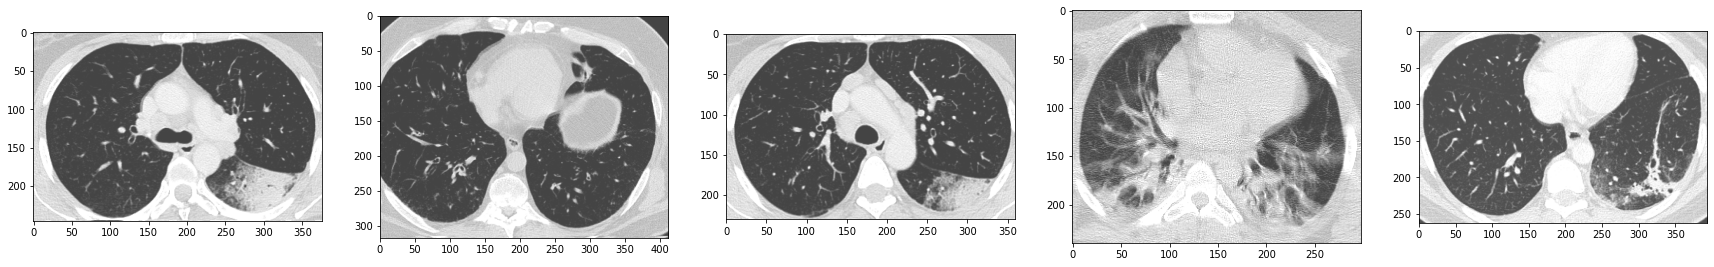

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


fig,axes=plt.subplots(1,5,figsize=(30,10))
for i in range(0,5):
  path=base_path+clas+image_path[i]
  image=mpimg.imread(path,0)
  axes[i].imshow(image)

  

**Non Covid -19 CT scan Images**

In [15]:
clas2='/non-COVID/'
im_path2=os.listdir('non-COVID')

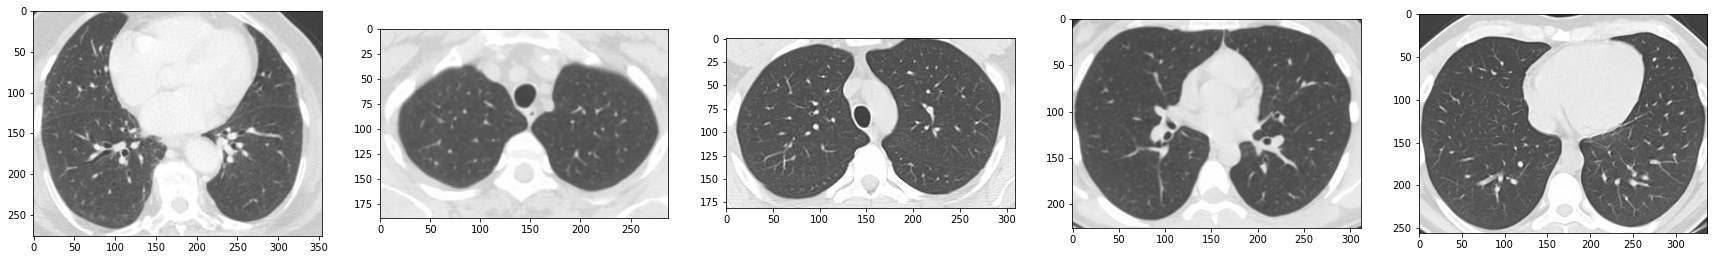

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(30,10))
k=0
for i in range(10,15):
  path=base_path+clas2+im_path2[i]
  image=mpimg.imread(path,0)
  axes[k].imshow(image)
  k+=1

**Import all the Required Libraries**

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [18]:
%cd /content/drive/My Drive/Colab Notebooks/Minor_Project

/content/drive/My Drive/Colab Notebooks/Minor_Project


In [ ]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

**Image Augmentation**

In [19]:
TRAINING_DIR='dataset/'
training_datagen=ImageDataGenerator(
    featurewise_center=True, samplewise_center=True,
    featurewise_std_normalization=True, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=30, width_shift_range=0.2,
    height_shift_range=0.2, brightness_range=None, shear_range=0.4, zoom_range=0.4, fill_mode='nearest',
    horizontal_flip=True, vertical_flip=True, rescale=1./255, validation_split=0.2
)
train_generator=training_datagen.flow_from_directory(TRAINING_DIR,
                                                     target_size=(128,128),
                                                     shuffle=True,
                                                     batch_size=128,
                                                     class_mode='categorical',
                                                     subset='training')
validation_generator=training_datagen.flow_from_directory(TRAINING_DIR,
                                                          target_size=(128,128),
                                                          class_mode='categorical',
                                                          subset='validation')

Found 1985 images belonging to 2 classes.
Found 495 images belonging to 2 classes.


**CONVOLUTION NEURAL NETWORK**

Convolution Neural Network Declaration

In [ ]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(128,128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       5

In [ ]:
my_model=model.fit_generator(train_generator,epochs=50,validation_data=validation_generator,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
16/16 [==============================] - 891s 54s/step - loss: 0.7006 - accuracy: 0.4955 - recall_1: 0.4955 - precision_1: 0.4955 - val_loss: 0.6933 - val_accuracy: 0.4949 - val_recall_1: 0.4949 - val_precision_1: 0.4949
Epoch 2/50
16/16 [==============================] - 20s 1s/step - loss: 0.6944 - accuracy: 0.5005 - recall_1: 0.5005 - precision_1: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4949 - val_recall_1: 0.4949 - val_precision_1: 0.4949
Epoch 3/50
16/16 [==============================] - 20s 1s/step - loss: 0.6937 - accuracy: 0.4834 - recall_1: 0.4834 - precision_1: 0.4834 - val_loss: 0.6932 - val_accuracy: 0.4949 - val_recall_1: 0.4949 - val_precision_1: 0.4949
Epoch 4/50
16/16 [==============================] - 21s 1s/step - loss: 0.6933 - accuracy: 0.4919 - recall_1: 0.4914 - precision_1: 0.4917 - val_loss: 0.6932 - val_accuracy: 0.4949 - val_recall_1: 0.4949 - val_precision_1: 0.4949
Epoch 5/50
16/16 [==============================] - 20s 1s/step - loss: 0.6933

In [ ]:
#os.mkdir('models')

In [ ]:
os.chdir('models')

In [ ]:
model.save('Sagar1.hdf5')

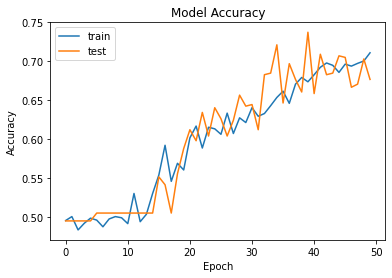

In [ ]:
plt.plot(my_model.history['accuracy'])
plt.plot(my_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

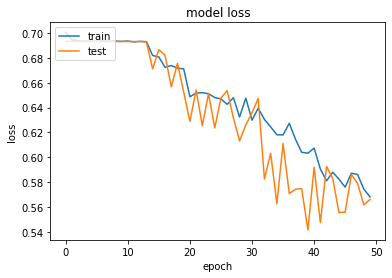

In [ ]:
plt.plot(my_model.history['loss'])
plt.plot(my_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.save('sahis1.npy',my_model.history)

In [ ]:
#Loading History Keys
history=np.load('sahis1.npy',allow_pickle='TRUE').item()
